# 1) Low variance check

In [55]:
import numpy as np
import pandas as pd

In [56]:
df= pd.read_csv('mpg.csv')
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [57]:
df.drop(['horsepower'], axis=1, inplace= True)
df.head()

,mpg,cylinders,displacement,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,3449,10.5,70,1,ford torino


In [58]:
x1= df.iloc[:,0:6]

print(x1[0:5])
print('......................................')

threasholder= VarianceThreshold(threshold= 0.5)

x1_high_variance= threasholder.fit_transform(x1)
print(x1_high_variance[0:5])

print(x1.shape)
print(x1_high_variance.shape)

    mpg  cylinders  displacement  weight  acceleration  model_year
0  18.0          8         307.0    3504          12.0          70
1  15.0          8         350.0    3693          11.5          70
2  18.0          8         318.0    3436          11.0          70
3  16.0          8         304.0    3433          12.0          70
4  17.0          8         302.0    3449          10.5          70
......................................
[[  18.     8.   307.  3504.    12.    70. ]
 [  15.     8.   350.  3693.    11.5   70. ]
 [  18.     8.   318.  3436.    11.    70. ]
 [  16.     8.   304.  3433.    12.    70. ]
 [  17.     8.   302.  3449.    10.5   70. ]]
(398, 6)
(398, 6)


VarianceThreshold, original number of columns= 6, new number of columns= 6

# 2) Principal component analysis

In [59]:
from sklearn.decomposition import PCA
x3= df.iloc[:,1:-2]
pca= PCA(0.95)
x3_pca= pca.fit_transform(x3)
x3_pca.shape

(398, 1)

PCA, original number of columns= 6, new number of columns= 1

# 3) Chi-square filter

In [52]:
# Feature selection 
# Using Chi-square statistical test

# select 5 most significant feature
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

bestfeatures= SelectKBest(score_func=chi2, k=5)
fit=bestfeatures.fit(x,y)
dfscores= pd.DataFrame(fit.scores_)
dfcolumns= pd.DataFrame(x.columns)

# Concat 2 dataframes for better visualization
featurescores= pd.concat([dfcolumns, dfscores], axis=1)
featurescores.columns= ['Features', 'Score']
print(featurescores.nlargest(12, 'Score'))

ValueError: Unknown label type: (array([[18. ],
       [15. ],
       [18. ],
       [16. ],
       [17. ],
       [15. ],
       [14. ],
       [14. ],
       [14. ],
       [15. ],
       [15. ],
       [14. ],
       [15. ],
       [14. ],
       [24. ],
       [22. ],
       [18. ],
       [21. ],
       [27. ],
       [26. ],
       [25. ],
       [24. ],
       [25. ],
       [26. ],
       [21. ],
       [10. ],
       [10. ],
       [11. ],
       [ 9. ],
       [27. ],
       [28. ],
       [25. ],
       [25. ],
       [19. ],
       [16. ],
       [17. ],
       [19. ],
       [18. ],
       [14. ],
       [14. ],
       [14. ],
       [14. ],
       [12. ],
       [13. ],
       [13. ],
       [18. ],
       [22. ],
       [19. ],
       [18. ],
       [23. ],
       [28. ],
       [30. ],
       [30. ],
       [31. ],
       [35. ],
       [27. ],
       [26. ],
       [24. ],
       [25. ],
       [23. ],
       [20. ],
       [21. ],
       [13. ],
       [14. ],
       [15. ],
       [14. ],
       [17. ],
       [11. ],
       [13. ],
       [12. ],
       [13. ],
       [19. ],
       [15. ],
       [13. ],
       [13. ],
       [14. ],
       [18. ],
       [22. ],
       [21. ],
       [26. ],
       [22. ],
       [28. ],
       [23. ],
       [28. ],
       [27. ],
       [13. ],
       [14. ],
       [13. ],
       [14. ],
       [15. ],
       [12. ],
       [13. ],
       [13. ],
       [14. ],
       [13. ],
       [12. ],
       [13. ],
       [18. ],
       [16. ],
       [18. ],
       [18. ],
       [23. ],
       [26. ],
       [11. ],
       [12. ],
       [13. ],
       [12. ],
       [18. ],
       [20. ],
       [21. ],
       [22. ],
       [18. ],
       [19. ],
       [21. ],
       [26. ],
       [15. ],
       [16. ],
       [29. ],
       [24. ],
       [20. ],
       [19. ],
       [15. ],
       [24. ],
       [20. ],
       [11. ],
       [20. ],
       [21. ],
       [19. ],
       [15. ],
       [31. ],
       [26. ],
       [32. ],
       [25. ],
       [16. ],
       [16. ],
       [18. ],
       [16. ],
       [13. ],
       [14. ],
       [14. ],
       [14. ],
       [29. ],
       [26. ],
       [26. ],
       [31. ],
       [32. ],
       [28. ],
       [24. ],
       [26. ],
       [24. ],
       [26. ],
       [31. ],
       [19. ],
       [18. ],
       [15. ],
       [15. ],
       [16. ],
       [15. ],
       [16. ],
       [14. ],
       [17. ],
       [16. ],
       [15. ],
       [18. ],
       [21. ],
       [20. ],
       [13. ],
       [29. ],
       [23. ],
       [20. ],
       [23. ],
       [24. ],
       [25. ],
       [24. ],
       [18. ],
       [29. ],
       [19. ],
       [23. ],
       [23. ],
       [22. ],
       [25. ],
       [33. ],
       [28. ],
       [25. ],
       [25. ],
       [26. ],
       [27. ],
       [17.5],
       [16. ],
       [15.5],
       [14.5],
       [22. ],
       [22. ],
       [24. ],
       [22.5],
       [29. ],
       [24.5],
       [29. ],
       [33. ],
       [20. ],
       [18. ],
       [18.5],
       [17.5],
       [29.5],
       [32. ],
       [28. ],
       [26.5],
       [20. ],
       [13. ],
       [19. ],
       [19. ],
       [16.5],
       [16.5],
       [13. ],
       [13. ],
       [13. ],
       [31.5],
       [30. ],
       [36. ],
       [25.5],
       [33.5],
       [17.5],
       [17. ],
       [15.5],
       [15. ],
       [17.5],
       [20.5],
       [19. ],
       [18.5],
       [16. ],
       [15.5],
       [15.5],
       [16. ],
       [29. ],
       [24.5],
       [26. ],
       [25.5],
       [30.5],
       [33.5],
       [30. ],
       [30.5],
       [22. ],
       [21.5],
       [21.5],
       [43.1],
       [36.1],
       [32.8],
       [39.4],
       [36.1],
       [19.9],
       [19.4],
       [20.2],
       [19.2],
       [20.5],
       [20.2],
       [25.1],
       [20.5],
       [19.4],
       [20.6],
       [20.8],
       [18.6],
       [18.1],
       [19.2],
       [17.7],
       [18.1],
       [17.5],
       [30. ],
       [27.5],
       [27.2],
       [30.9],
       [21.1],
       [23.2],
       [23.8],
       [23.9],
       [20.3],
       [17. ],
       [21.6],
       [16.2],
       [31.5],
       [29.5],
       [21.5],
       [19.8],
       [22.3],
       [20.2],
       [20.6],
       [17. ],
       [17.6],
       [16.5],
       [18.2],
       [16.9],
       [15.5],
       [19.2],
       [18.5],
       [31.9],
       [34.1],
       [35.7],
       [27.4],
       [25.4],
       [23. ],
       [27.2],
       [23.9],
       [34.2],
       [34.5],
       [31.8],
       [37.3],
       [28.4],
       [28.8],
       [26.8],
       [33.5],
       [41.5],
       [38.1],
       [32.1],
       [37.2],
       [28. ],
       [26.4],
       [24.3],
       [19.1],
       [34.3],
       [29.8],
       [31.3],
       [37. ],
       [32.2],
       [46.6],
       [27.9],
       [40.8],
       [44.3],
       [43.4],
       [36.4],
       [30. ],
       [44.6],
       [40.9],
       [33.8],
       [29.8],
       [32.7],
       [23.7],
       [35. ],
       [23.6],
       [32.4],
       [27.2],
       [26.6],
       [25.8],
       [23.5],
       [30. ],
       [39.1],
       [39. ],
       [35.1],
       [32.3],
       [37. ],
       [37.7],
       [34.1],
       [34.7],
       [34.4],
       [29.9],
       [33. ],
       [34.5],
       [33.7],
       [32.4],
       [32.9],
       [31.6],
       [28.1],
       [30.7],
       [25.4],
       [24.2],
       [22.4],
       [26.6],
       [20.2],
       [17.6],
       [28. ],
       [27. ],
       [34. ],
       [31. ],
       [29. ],
       [27. ],
       [24. ],
       [23. ],
       [36. ],
       [37. ],
       [31. ],
       [38. ],
       [36. ],
       [36. ],
       [36. ],
       [34. ],
       [38. ],
       [32. ],
       [38. ],
       [25. ],
       [38. ],
       [26. ],
       [22. ],
       [32. ],
       [36. ],
       [27. ],
       [27. ],
       [44. ],
       [32. ],
       [28. ],
       [31. ]]),)

Chi-square technique works only for **Classification problem**.

# 4) Feature importance

In [60]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size=0.3, random_state=12)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(278, 6) (120, 6) (278, 1) (120, 1)


In [61]:
from sklearn.tree import DecisionTreeRegressor
dt= DecisionTreeRegressor()
dt.fit(x, y)
dt.feature_importances_

array([0.0027828 , 0.64442242, 0.16249281, 0.03770076, 0.14297965,
       0.00962157])

In [62]:
pd.DataFrame(index=x.columns, data= dt.feature_importances_, columns=['Feature Importance'])

,Feature Importance
cylinders,0.002783
displacement,0.644422
weight,0.162493
acceleration,0.037701
model_year,0.142980
origin,0.009622


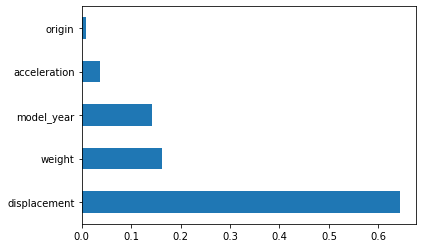

In [63]:
import matplotlib.pyplot as plt

feature_imp= pd.Series(dt.feature_importances_, index=x.columns)
feature_imp.nlargest(5).plot(kind='barh')
plt.show()

Feature importance, displacement gets highest importance.

# 5) Lasso

In [54]:
from sklearn.linear_model import Lasso

lasso= Lasso(alpha=0.1)
lasso.fit(x,y)
print('Lasso model:', (lasso.coef_))

Lasso model: [-0.          0.00880606 -0.00693222  0.11432307  0.75584346  1.06945936]


Lass, original number of columns= 6, new number of columns= 5.

# 6) Correlation matrix

In [65]:
df.corr()

,mpg,cylinders,displacement,weight,acceleration,model_year,origin
mpg,1.000000,-0.775396,-0.804203,-0.831741,0.420289,0.579267,0.563450
cylinders,-0.775396,1.000000,0.950721,0.896017,-0.505419,-0.348746,-0.562543
displacement,-0.804203,0.950721,1.000000,0.932824,-0.543684,-0.370164,-0.609409
weight,-0.831741,0.896017,0.932824,1.000000,-0.417457,-0.306564,-0.581024
acceleration,0.420289,-0.505419,-0.543684,-0.417457,1.000000,0.288137,0.205873
model_year,0.579267,-0.348746,-0.370164,-0.306564,0.288137,1.000000,0.180662
origin,0.563450,-0.562543,-0.609409,-0.581024,0.205873,0.180662,1.000000


Correlation matrix, displacement and weight are highly correlated.